In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from google.colab import files
uploaded = files.upload()

Saving test_lAUu6dG.csv to test_lAUu6dG (1).csv
Saving train_ctrUa4K.csv to train_ctrUa4K (1).csv


In [2]:
df_train = pd.read_csv('train_ctrUa4K.csv')
df_test = pd.read_csv('test_lAUu6dG.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
train_original = df_train.copy()
test_original = df_test.copy()
print(train_original.columns)
train_original.shape,test_original.shape

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


((614, 13), (367, 12))

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


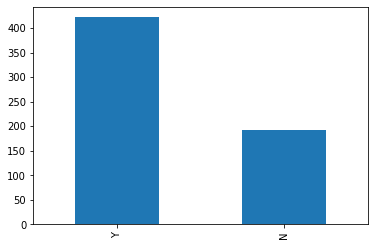

In [4]:
print(df_train['Loan_Status'].value_counts())
print(df_train['Loan_Status'].value_counts(normalize = True))
df_train['Loan_Status'].value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

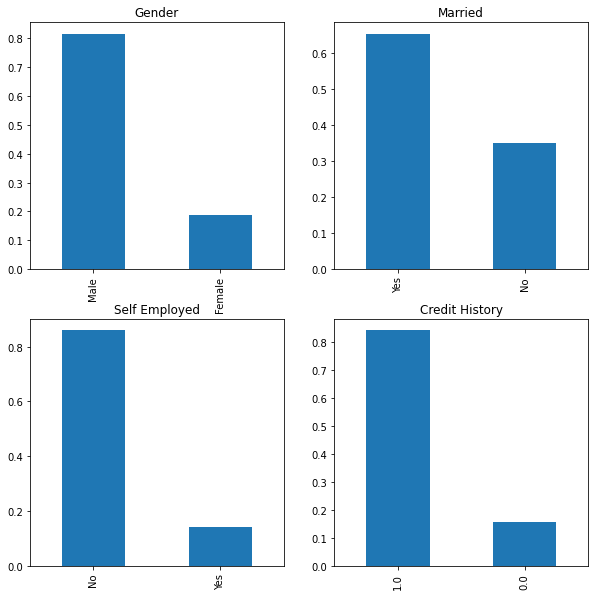

In [5]:
plt.figure(1) 
plt.subplot(221)
df_train['Gender'].value_counts(normalize = True).plot.bar(figsize = (10,10),title = 'Gender')
plt.subplot(222)
df_train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')
plt.subplot(223)
df_train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed')
plt.subplot(224)
df_train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')
plt.show()

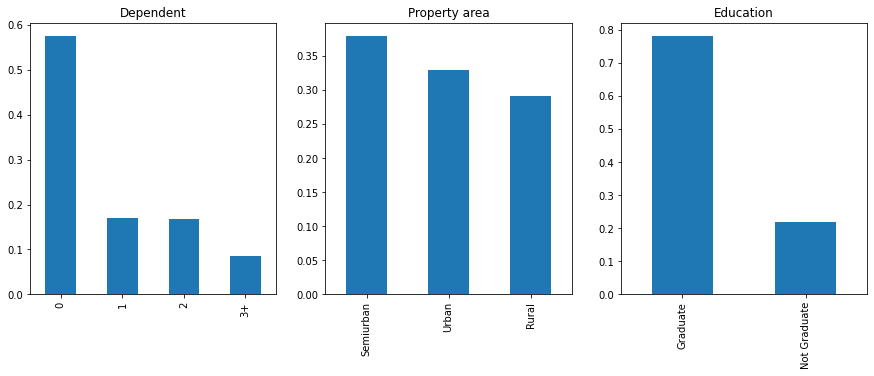

In [6]:
plt.figure(1)
plt.subplot(1,3,1)
df_train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (15,5),title = 'Dependent')
plt.subplot(1,3,2)
df_train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property area')
plt.subplot(1,3,3)
df_train['Education'].value_counts(normalize= True).plot.bar(title = 'Education')
plt.show()

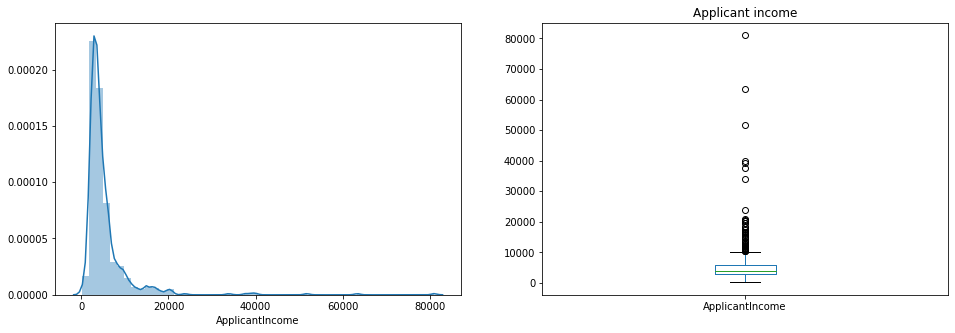

In [7]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(df_train['ApplicantIncome']);
plt.subplot(1,2,2)
df_train['ApplicantIncome'].plot.box(figsize = (16,5),title = 'Applicant income')
plt.show()

Text(0.5, 0.98, '')

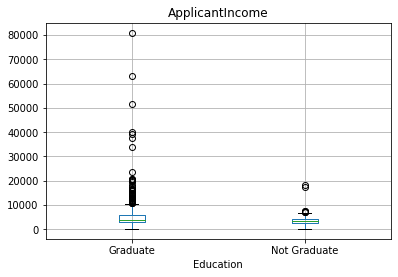

In [8]:
df_train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

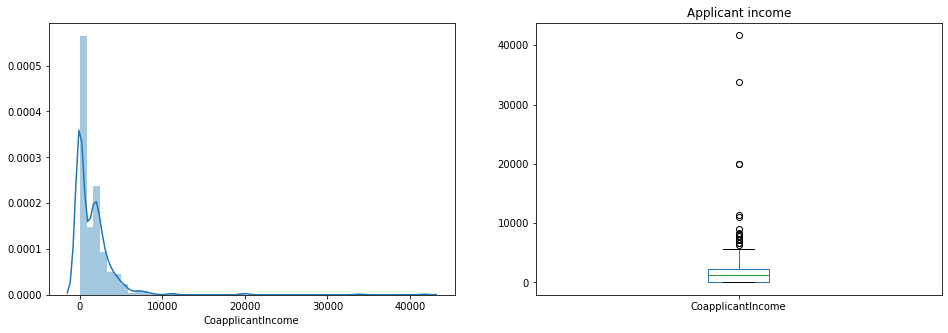

In [9]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(df_train['CoapplicantIncome']);
plt.subplot(1,2,2)
df_train['CoapplicantIncome'].plot.box(figsize = (16,5),title = 'Applicant income')
plt.show()

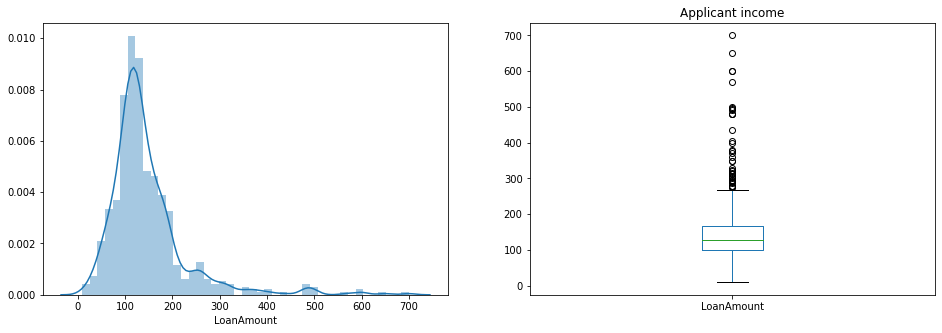

In [10]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(df_train['LoanAmount']);
plt.subplot(1,2,2)
df_train['LoanAmount'].plot.box(figsize = (16,5),title = 'Applicant income')
plt.show()

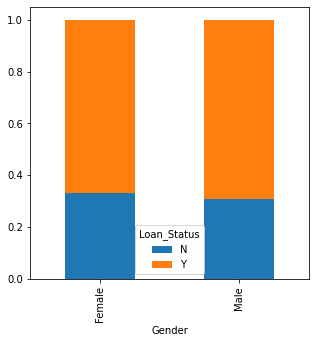

In [11]:
gender = pd.crosstab(df_train['Gender'],df_train['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True,figsize = (5,5))

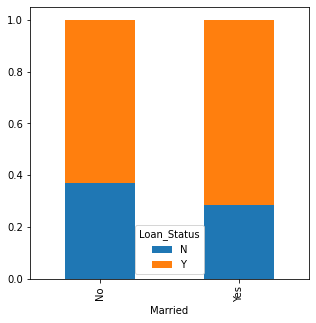

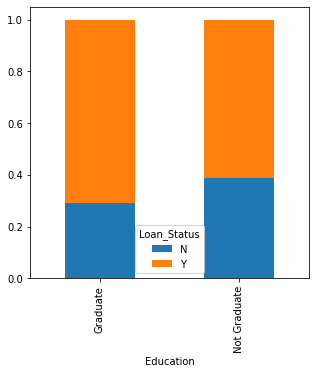

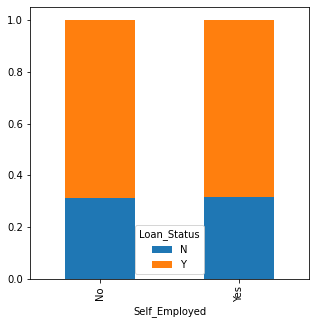

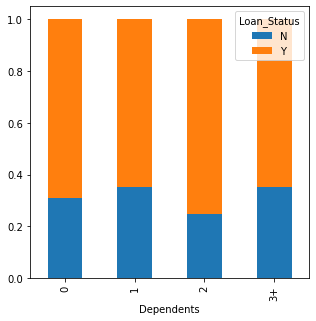

In [12]:
married = pd.crosstab(df_train['Married'],df_train['Loan_Status'])
married.div(married.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True,figsize = (5,5))
education = pd.crosstab(df_train['Education'],df_train['Loan_Status'])
education.div(education.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True,figsize = (5,5))
SelfEmployed = pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status'])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True,figsize = (5,5))
dependents = pd.crosstab(df_train['Dependents'],df_train['Loan_Status'])
dependents.div(dependents.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True,figsize = (5,5))

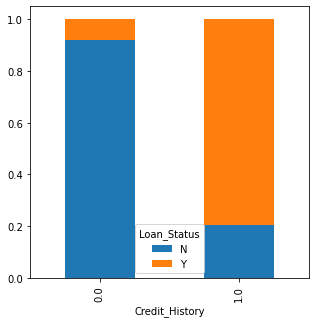

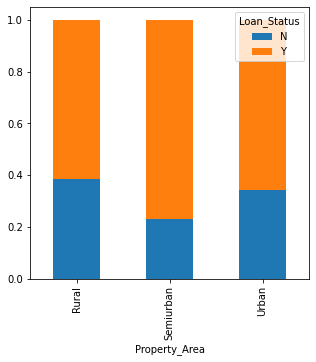

In [13]:
creditHistory = pd.crosstab(df_train['Credit_History'],df_train['Loan_Status'])
creditHistory.div(creditHistory.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True,figsize = (5,5))
propertyArea = pd.crosstab(df_train['Property_Area'],df_train['Loan_Status'])
propertyArea.div(propertyArea.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True,figsize = (5,5))

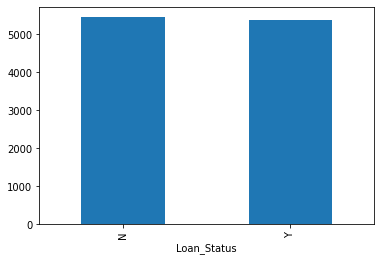

In [14]:
df_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

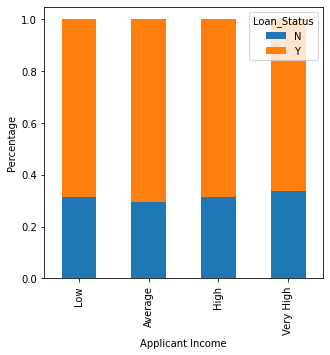

In [15]:
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average','High','Very High']
df_train['IncomeBin'] = pd.cut(df_train['ApplicantIncome'],bins,labels = group)
Income_bin = pd.crosstab(df_train['IncomeBin'],df_train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True,figsize = (5,5))
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

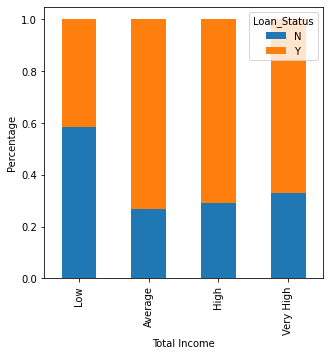

In [16]:
df_train['Total_Income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low', 'Average','High','Very High']
df_train['TotalIncomeBin'] = pd.cut(df_train['Total_Income'],bins,labels = group)
Total_Income_bin = pd.crosstab(df_train['TotalIncomeBin'],df_train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True,figsize = (5,5))
plt.xlabel('Total Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

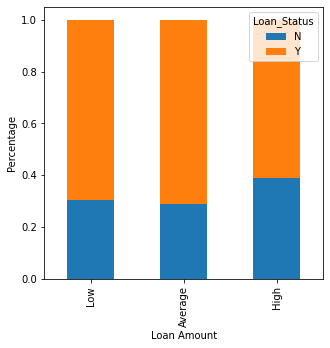

In [17]:
bins = [0,100,200,700]
group = ['Low', 'Average','High']
df_train['LoanAmountBin'] = pd.cut(df_train['LoanAmount'],bins,labels = group)
Loan_amount_bin = pd.crosstab(df_train['LoanAmountBin'],df_train['Loan_Status'])
Loan_amount_bin.div(Loan_amount_bin.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True,figsize = (5,5))
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

In [0]:
df_train = df_train.drop(['IncomeBin', 'Total_Income', 'TotalIncomeBin', 'LoanAmountBin'], axis = 1)

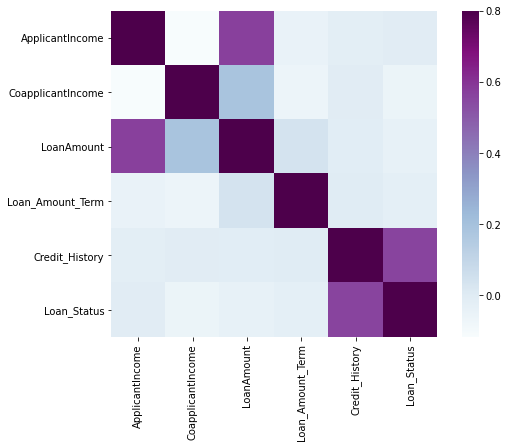

In [19]:
df_train['Dependents'].replace('3+',3, inplace = True)
df_test['Dependents'].replace('3+',3, inplace = True)
df_train['Loan_Status'].replace('N', 0,inplace = True)
df_train['Loan_Status'].replace('Y', 1, inplace = True)

matrix = df_train.corr()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax = .8, square=True, cmap = 'BuPu');


In [20]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace = True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace = True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace = True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace = True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace = True)


In [0]:
df_train['Loan_Amount_Term'].value_counts()
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace = True)

In [23]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace = True)
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [0]:
df_test['Gender'].fillna(df_train['Gender'].mode()[0], inplace = True)
df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace = True)
df_test['Married'].fillna(df_train['Married'].mode()[0], inplace = True)
df_test['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace = True)
df_test['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace = True)
df_test['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace = True)
df_test['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace = True)

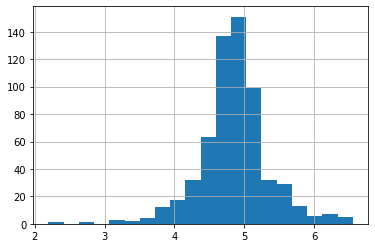

In [25]:
df_train['Loan_Amount_Log'] = np.log(df_train['LoanAmount'])
df_train['Loan_Amount_Log'].hist(bins = 20)
df_test['Loan_Amount_Log'] = np.log(df_test['LoanAmount'])

In [0]:
df_train = df_train.drop('Loan_ID',axis = 1)
df_test = df_test.drop('Loan_ID',1)

In [0]:
X = df_train.drop('Loan_Status',1)
y = df_train['Loan_Status']

In [0]:
X = pd.get_dummies(X)
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_cv ,y_train,y_cv = train_test_split(X,y, test_size = 0.3)

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
ypred = model.predict(x_cv)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_cv,ypred.flat)

0.827027027027027

In [0]:
pred_test = model.predict(df_test)


In [34]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission_49d68Cx.csv to sample_submission_49d68Cx (1).csv


In [0]:
submissions = pd.read_csv('sample_submission_49d68Cx.csv')

In [0]:
submissions['Loan_Status'] = pred_test
submissions['Loan_ID'] = test_original['Loan_ID']

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
y_LR_pred = model.predict(x_cv)
accuracy_score(y_cv,y_LR_pred)

0.8378378378378378

In [39]:
model.predict(df_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [40]:
from sklearn.model_selection import StratifiedKFold
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(df_test) 
pred=model.predict_proba(xvl)[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


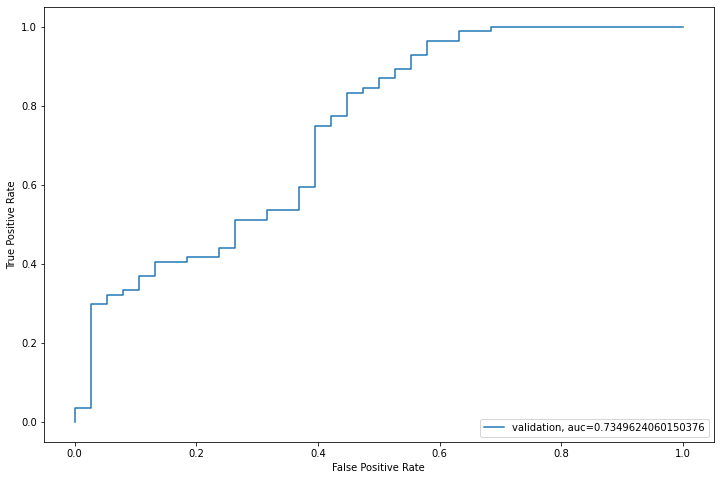

In [41]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

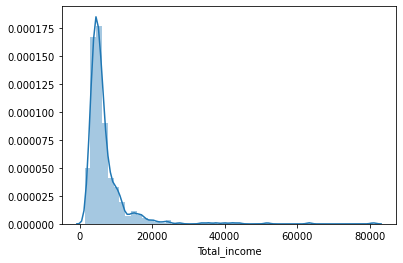

In [43]:
df_train['Total_income'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
sns.distplot(df_train['Total_income'])
df_test['Total_income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']

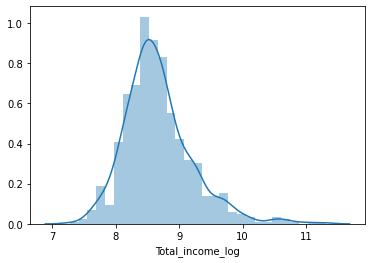

In [44]:
df_train['Total_income_log'] = np.log(df_train['Total_income'])
sns.distplot(df_train['Total_income_log'])
df_test['Total_income_log'] = np.log(df_test['Total_income'])

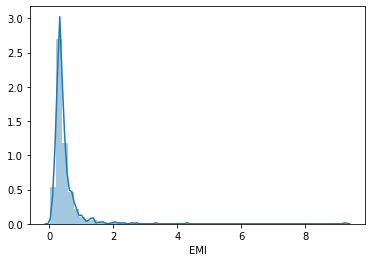

In [46]:
df_train['EMI'] = df_train['LoanAmount'] / df_train['Loan_Amount_Term']
df_test['EMI'] = df_test['LoanAmount'] / df_test['Loan_Amount_Term']
sns.distplot(df_train['EMI'])

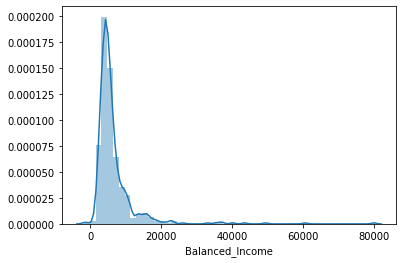

In [47]:
df_train['Balanced_Income'] = (df_train['Total_income'] - df_train['EMI'] * 1000)
sns.distplot(df_train['Balanced_Income'])
df_test['Balanced_Income'] = (df_test['Total_income'] - df_test['EMI'] * 1000)

In [0]:
df_train = df_train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis = 1)
df_test = df_test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis = 1)

In [65]:
X = df_train.drop('Loan_Status',1)
y = df_train['Loan_Status']
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.3)
model = GaussianNB()
model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
pred_test_GNB_test = model.predict(ytest.values.reshape(-1,1))
accuracy_score(ytest,pred_test_GNB_test)

0.2918918918918919

In [88]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
mean_score = 0
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state = 1, max_depth = 10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    mean_score += score    
    print('accuracy_score',score)     
    i+=1 
pred_test = model.predict(df_test) 
pred=model.predict_proba(xvl)[:,1]
print('mean score: ',mean_score / 5 )


1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377
mean score:  0.7947221111555378


In [0]:
submissions['Loan_Status']=pred_test 
submissions['Loan_ID']=test_original['Loan_ID']
submissions['Loan_Status'].replace(0, 'N',inplace=True) 
submissions['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submissions, columns=['Loan_ID','Loan_Status']).to_csv('Random_Forest.csv')

In [0]:
files.download('Random_Forest.csv')